In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings 

bookings = pd.read_csv('/Users/vels/Desktop/MyPy/00_Assignment/Datasets/Bookings.csv')
sessions = pd.read_csv('/Users/vels/Desktop/MyPy/00_Assignment/Datasets/Sessions.csv')

# Ignore the warnings
warnings.filterwarnings("ignore")

                   INR_Amount  no_of_passengers  days_to_departure  \
INR_Amount           1.000000          0.397229           0.284534   
no_of_passengers     0.397229          1.000000           0.187128   
days_to_departure    0.284534          0.187128           1.000000   
distance_km          0.623565          0.001698           0.216972   

                   distance_km  
INR_Amount            0.623565  
no_of_passengers      0.001698  
days_to_departure     0.216972  
distance_km           1.000000  


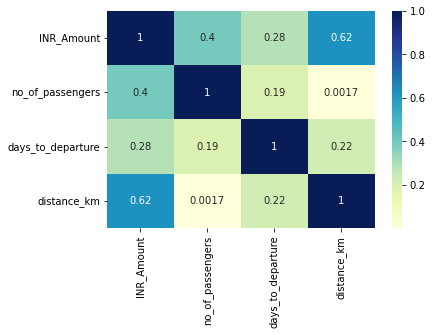

In [12]:
### 7. Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns 
###     in the bookings dataset, have the maximum correlation?

bookings.head()

print(bookings.corr())
sns.heatmap(bookings.corr(), cmap="YlGnBu", annot=True);

In [209]:
#report which pair of numerical columns in the bookings dataset, have the maximum correlation?
ex7a=bookings['INR_Amount'].corr(bookings['distance_km'])
print("Max correlation is between [INR Amount] and the [Distance Kms]:", ex7a)

Max correlation is between [INR Amount] and the [Distance Kms]: 0.6235653096997811


In [29]:
### 8. For each service, which is the most used device type for making bookings on the platform?
bookings.head()

n8 = bookings.device_type_used.value_counts().head(1).to_string()
n8a = n8.split()

print(f"!!! '\033[1m{n8a[0]}\033[0m' is most used device with more number of bookings(\033[1m{n8a[1]}\033[0m) !!!")

!!! 'Desktop' is most used device with more number of bookings(142) !!!


In [147]:
### 9. Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, 
###    plot a time series for each year and quarter showing the number of bookings performed by each device type

bookings['booking_time'] = pd.to_datetime(bookings.booking_time)
bookings['Year'] = bookings.booking_time.dt.year
bookings['Q'] = bookings.booking_time.dt.quarter
bookings['Qtr'] = pd.PeriodIndex(bookings.booking_time, freq='Q')
bookings.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,Q,Year,Qtr
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05 16:12:08+00:00,Desktop,2565.28,MMT,1.0,10.0,747.8,1,2020,2020Q1
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21 08:21:47+00:00,Android,23120.00,YATRA,1.0,1.0,6701.5,4,2018,2018Q4
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16 22:54:58+00:00,Android,25717.60,YATRA,1.0,32.0,7712.0,4,2019,2019Q4
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29 12:25:38+00:00,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,4,2021,2021Q4
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11 16:09:10+00:00,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,3,2020,2020Q3


In [118]:
pivot9 = pd.pivot_table(
    data=bookings,
    index=['device_type_used'],
    columns='Year',
    values='booking_id',
    aggfunc='count',
    fill_value=0,
    margins=False,
    margins_name='Grand Total')

#print(pivot9)
ex9a = pd.DataFrame(pivot9)
print(ex9a)
ex9a = ex9a.reset_index()  
ex9a.columns

Year              2018  2019  2020  2021  2022
device_type_used                              
Android              6    17    30    13     4
Desktop             28    24    41    37    12
IOS                  4    18    31    27    17
MobileWeb            6     0    11     7     3
Tablet               2     1     0     0     0


Index(['device_type_used', 2018, 2019, 2020, 2021, 2022], dtype='object', name='Year')

In [119]:
columns = ['device_type_used', '2018', '2019', '2020', '2021', '2022']
ex9a.columns = columns
ex9a

,device_type_used,2018,2019,2020,2021,2022
0,Android,6,17,30,13,4
1,Desktop,28,24,41,37,12
2,IOS,4,18,31,27,17
3,MobileWeb,6,0,11,7,3
4,Tablet,2,1,0,0,0


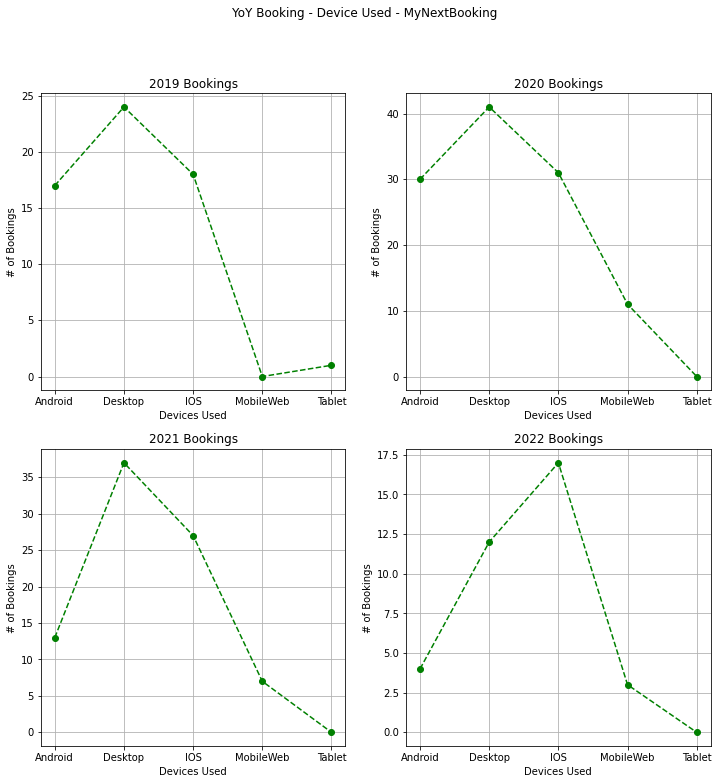

In [131]:
import matplotlib.pyplot as plt

# Syntax = plt.subplots(row, cols)
fig, ax = plt.subplots(2,2,figsize=(12,12))

ax[0,0].plot(ex9a['device_type_used'],ex9a['2019'],'g--o', label='2019')
ax[0,0].set_title('2019 Bookings')
ax[0,0].set_xlabel('Devices Used')
ax[0,0].set_ylabel('# of Bookings')
ax[0,0].grid()

ax[0,1].plot(ex9a['device_type_used'],ex9a['2020'],'g--o', label='2020')
ax[0,1].set_title('2020 Bookings')
ax[0,1].set_xlabel('Devices Used')
ax[0,1].set_ylabel('# of Bookings')
ax[0,1].grid()

ax[1,0].plot(ex9a['device_type_used'],ex9a['2021'],'g--o', label='2021')
ax[1,0].set_title('2021 Bookings')
ax[1,0].set_xlabel('Devices Used')
ax[1,0].set_ylabel('# of Bookings')
ax[1,0].grid()

ax[1,1].plot(ex9a['device_type_used'],ex9a['2022'],'g--o', label='2022')
ax[1,1].set_title('2022 Bookings')
ax[1,1].set_xlabel('Devices Used')
ax[1,1].set_ylabel('# of Bookings')
ax[1,1].grid()

fig.suptitle('YoY Booking - Device Used - MyNextBooking')
plt.show()

In [133]:
#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()

In [144]:
##ex9b = pd.read_csv('/Users/vels/Desktop/MyPy/00_Assignment/Datasets/Bookings.csv', parse_dates=['booking_time'])
##ex9b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   customer_id        339 non-null    object             
 1   booking_id         339 non-null    object             
 2   from_city          339 non-null    object             
 3   from_country       339 non-null    object             
 4   to_city            339 non-null    object             
 5   to_country         339 non-null    object             
 6   booking_time       339 non-null    datetime64[ns, UTC]
 7   device_type_used   339 non-null    object             
 8   INR_Amount         339 non-null    float64            
 9   service_name       339 non-null    object             
 10  no_of_passengers   339 non-null    float64            
 11  days_to_departure  339 non-null    float64            
 12  distance_km        339 non-null    float64        

In [162]:
ex9b = bookings.copy()
ex9b.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,Q,Year,Qtr
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05 16:12:08+00:00,Desktop,2565.28,MMT,1.0,10.0,747.8,1,2020,2020Q1
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21 08:21:47+00:00,Android,23120.00,YATRA,1.0,1.0,6701.5,4,2018,2018Q4
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16 22:54:58+00:00,Android,25717.60,YATRA,1.0,32.0,7712.0,4,2019,2019Q4
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29 12:25:38+00:00,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,4,2021,2021Q4
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11 16:09:10+00:00,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,3,2020,2020Q3


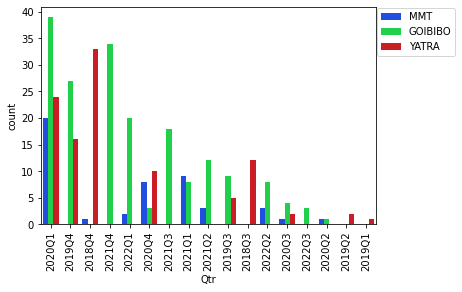

In [190]:
ex9b['count'] = ex9b.groupby('Qtr')['service_name'].transform('count')

ex9b.sort_values(by='count',ascending=False,inplace=True)

# count plot on single categorical variable
sns.countplot(x = 'Qtr',hue ='service_name', data = ex9b)
plt.legend(bbox_to_anchor=(1,1), loc=2, borderaxespad=0.1,)
plt.xticks(rotation=90)
# Show the plot
plt.show()

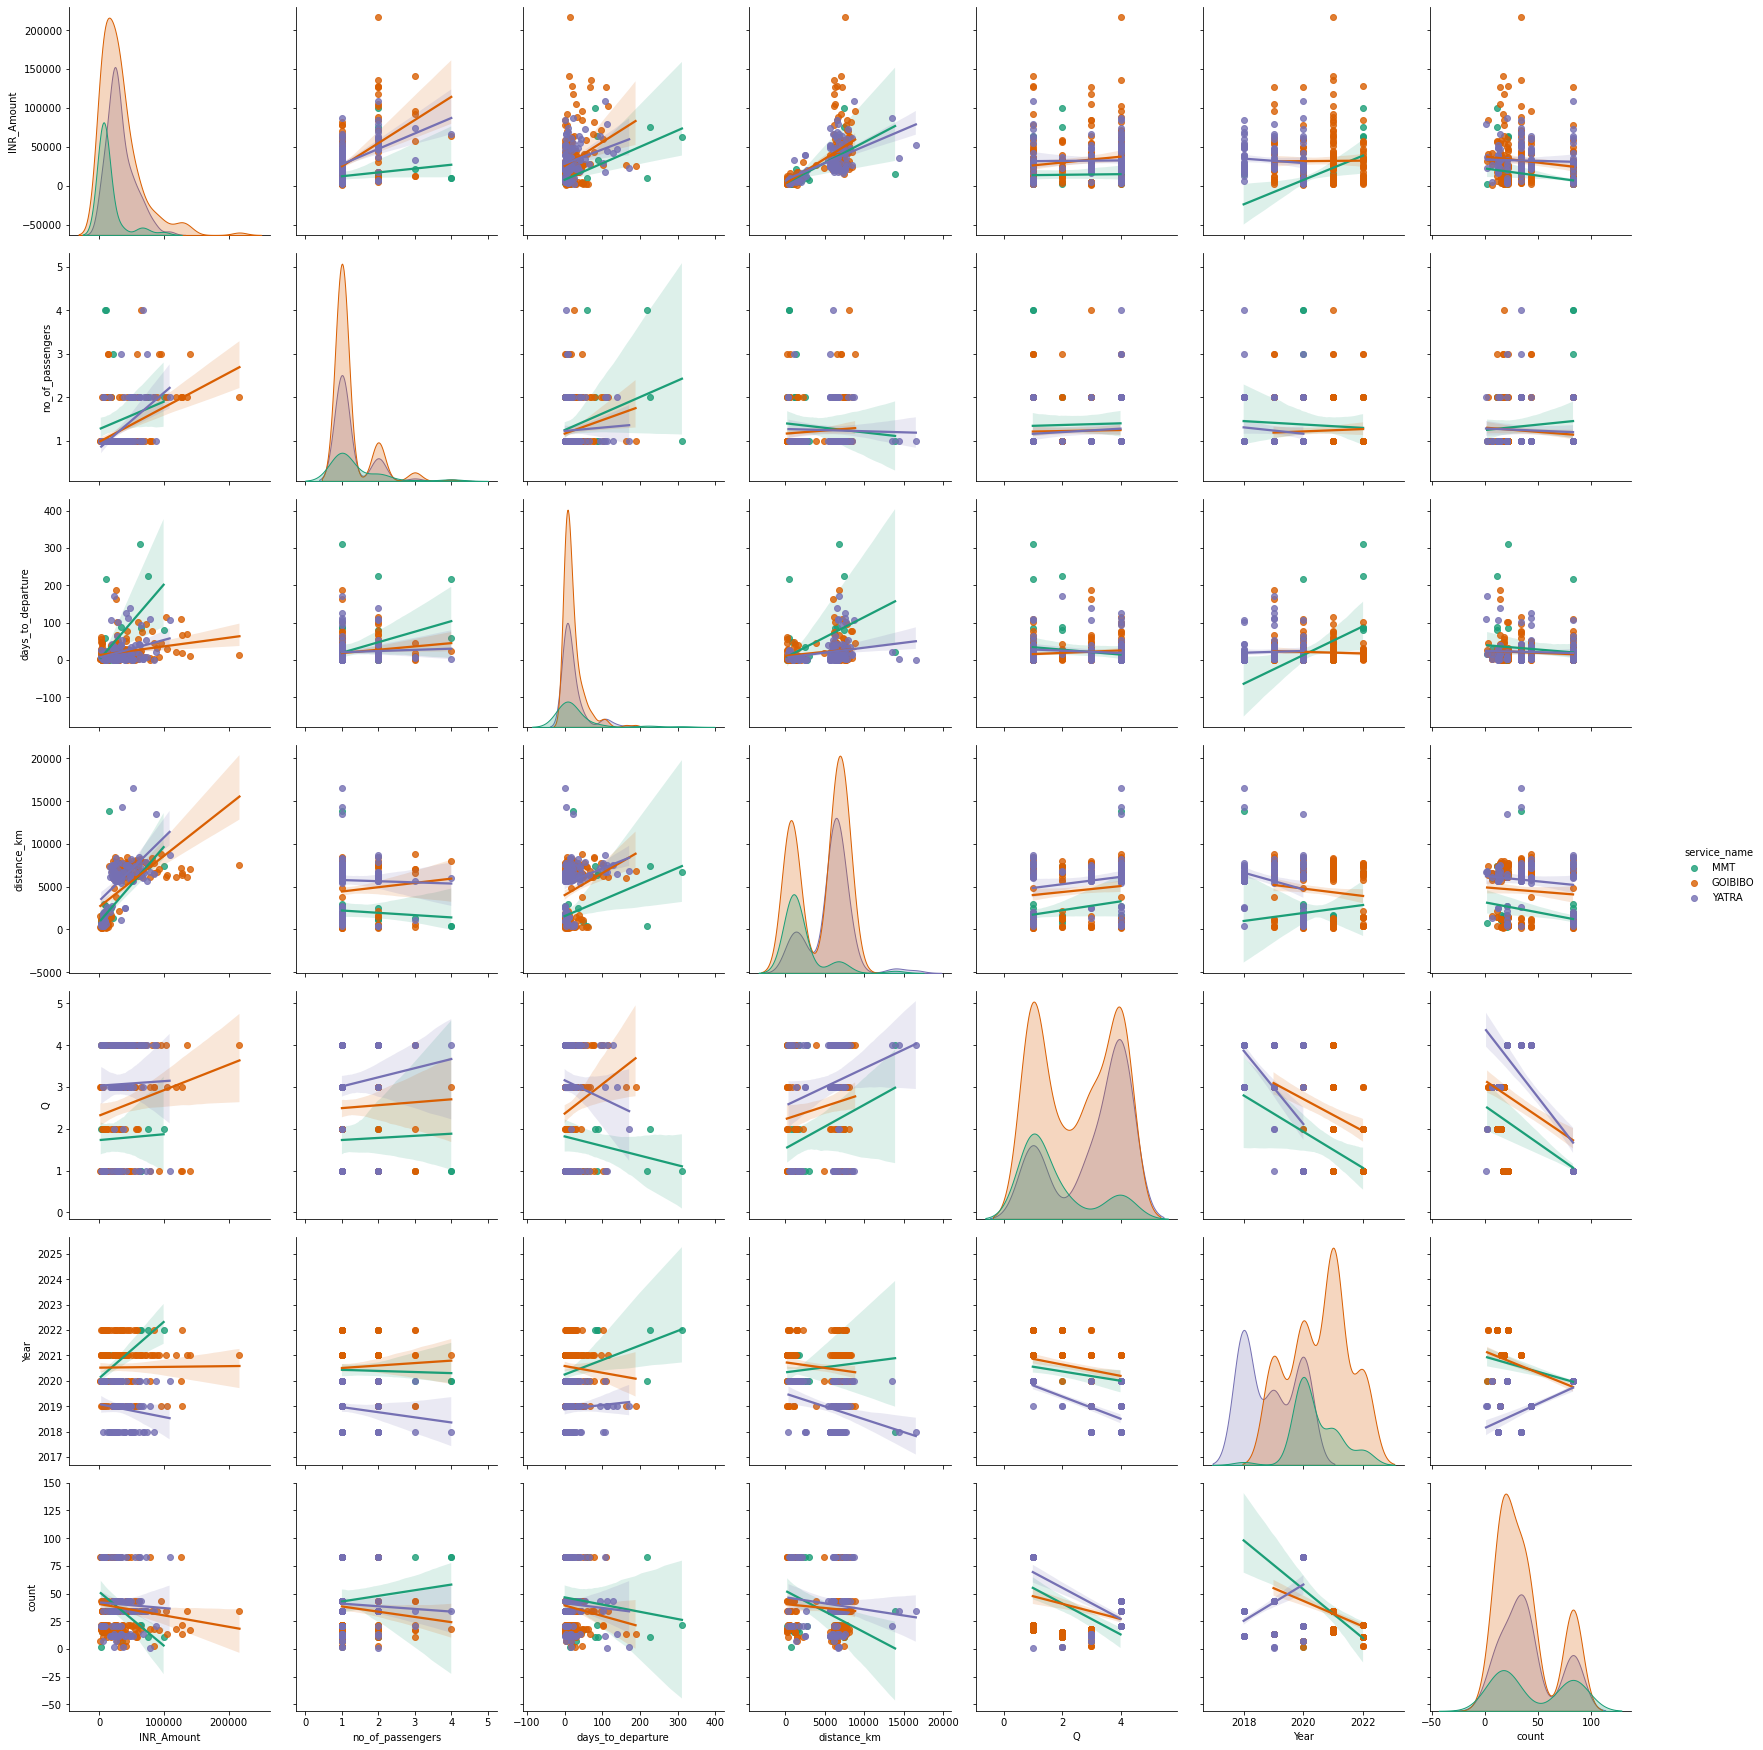

In [183]:
g = sns.pairplot(ex9b, hue="service_name",kind='reg',palette='Dark2')
g.fig.set_size_inches(25,25)

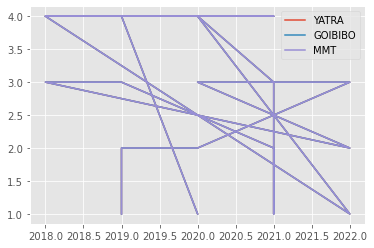

In [210]:
service_set = set(ex9b['service_name'])

plt.figure()
for service in service_set:
     selected_data = ex9b.loc[ex9b['service_name'] == service]
     plt.plot(ex9b['Year'], ex9b['Q'], label=service)
     
plt.legend()
plt.show()

In [213]:
ex9b.head(5)

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,Q,Year,Qtr,count
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05 16:12:08+00:00,Desktop,2565.28,MMT,1.0,10.0,747.8,1,2020,2020Q1,83
113,customer_235,booking_26,Gurgaon,India,Bhubaneswar,India,2020-03-19 09:15:19+00:00,Android,6467.20,GOIBIBO,1.0,2.0,1274.7,1,2020,2020Q1,83
195,customer_1,booking_115,Gurgaon,India,Guwahati,India,2020-03-02 11:50:51+00:00,IOS,7233.60,YATRA,1.0,11.0,1476.4,1,2020,2020Q1,83
111,customer_144,booking_296,Surat,India,Devanhalli,India,2020-02-09 16:50:05+00:00,Desktop,8208.80,GOIBIBO,1.0,1.0,1022.5,1,2020,2020Q1,83
69,customer_208,booking_33,Mumbai,India,Chicalim,India,2020-02-14 15:01:05+00:00,IOS,4395.01,GOIBIBO,1.0,1.0,420.7,1,2020,2020Q1,83
